In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from evaluate_prf1 import evaluate_prf1

In [18]:

def prf1_sweep(pkl_paths, req_overlap=0.5):
    for i, pkl_path in enumerate(pkl_paths):
        pkl_file = open(pkl_path, 'rb')
        if i == 0:
            overlap_mat, err_ang_mat, err_dist_mat, num_assoc_mat = pickle.load(pkl_file)
            overlap_mat = np.reshape(overlap_mat, (-1,1))
            err_ang_mat = np.reshape(err_ang_mat, (-1,1))
            err_dist_mat = np.reshape(err_dist_mat, (-1,1))
            num_assoc_mat = np.reshape(num_assoc_mat, (-1,1))
        else:
            om, eam, edm, nam = pickle.load(pkl_file)
            overlap_mat = np.concatenate((overlap_mat, np.reshape(om, (-1,1))), axis=0)
            err_ang_mat = np.concatenate((err_ang_mat, np.reshape(eam, (-1,1))), axis=0)
            err_dist_mat = np.concatenate((err_dist_mat, np.reshape(edm, (-1,1))), axis=0)
            num_assoc_mat = np.concatenate((num_assoc_mat, np.reshape(nam, (-1,1))), axis=0)
            
    assoc_reqs = np.arange(4, 20)
    precisions = []
    recalls = []
    f1s = []
    for req_assoc in assoc_reqs:
        precision, recall, f1 = evaluate_prf1(overlap_mat, err_ang_mat, err_dist_mat, num_assoc_mat, req_err_ang=3., req_err_dist=1.5, req_overlap=req_overlap, req_assoc=req_assoc)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
    # return precisions, recalls, f1s, assoc_reqs
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].plot(assoc_reqs, precisions, label='Precision')
    ax[1].plot(assoc_reqs, recalls, label='Recall')
    ax[2].plot(assoc_reqs, f1s, label='F1')
    ax[0].set_title('Precision')
    ax[1].set_title('Recall')
    ax[2].set_title('F1')
    ax[0].set_xlabel('Required Associations')
    ax[1].set_xlabel('Required Associations')
    ax[2].set_xlabel('Required Associations')
    return precisions, recalls, f1s, assoc_reqs

In [19]:
results_dir = "/home/masonbp/results/west_point_2023/segment_align/20_paper"
sub_dirs = [
    # "sparkal2_sparkal1_same",
    # "acl_jackal2_sparkal2_same",
    # "acl_jackal2_sparkal1_same",
    "sparkal2_sparkal1_opposite",
    "acl_jackal2_sparkal2_perpendicular",
    "acl_jackal2_sparkal1_perpendicular",
]
req_overlap = 0.5
methods = ["gravity", "point2d", "point3d", "vol2d", "vol3d", "volgrav", "prunegrav", "prunevol2d", "prunevol3d", "prunevolgrav", "distfeatpca", "extentvolgrav"]

Method: gravity
Best F1: 0.2564102564102564 at 9 associations


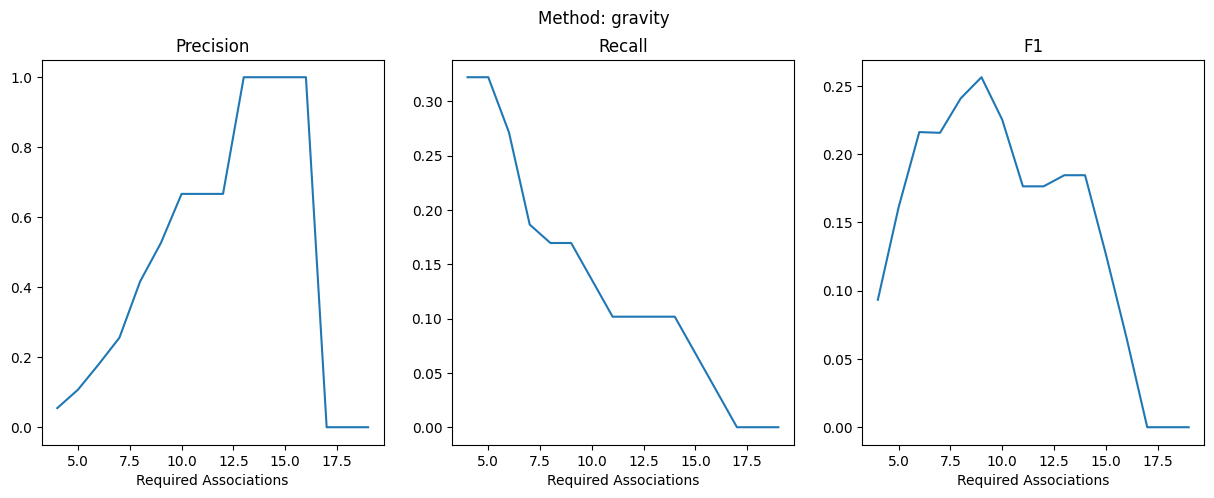

Method: point2d
Best F1: 0.17910447761194032 at 15 associations


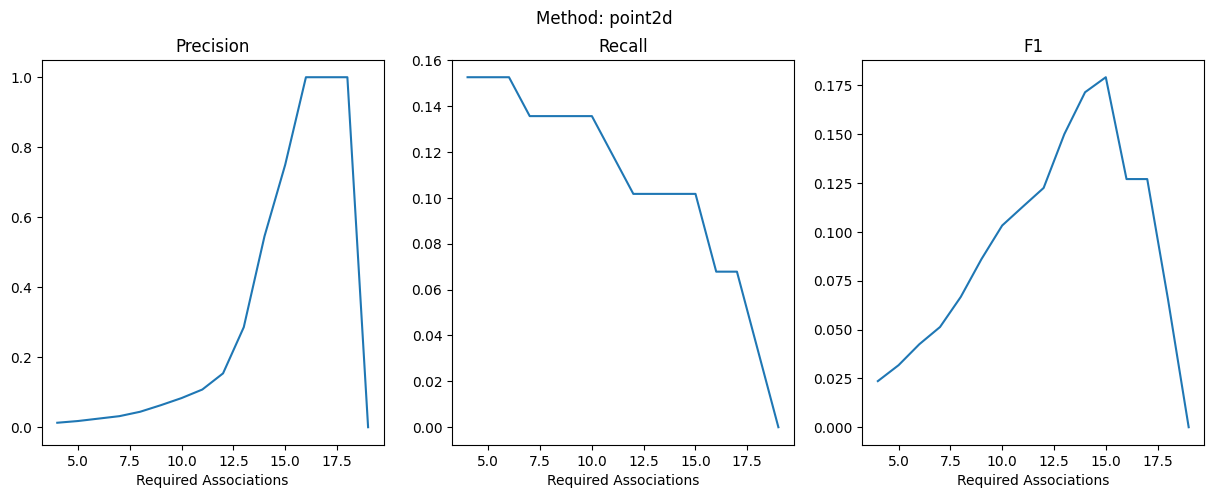

Method: point3d
Best F1: 0.17910447761194032 at 15 associations


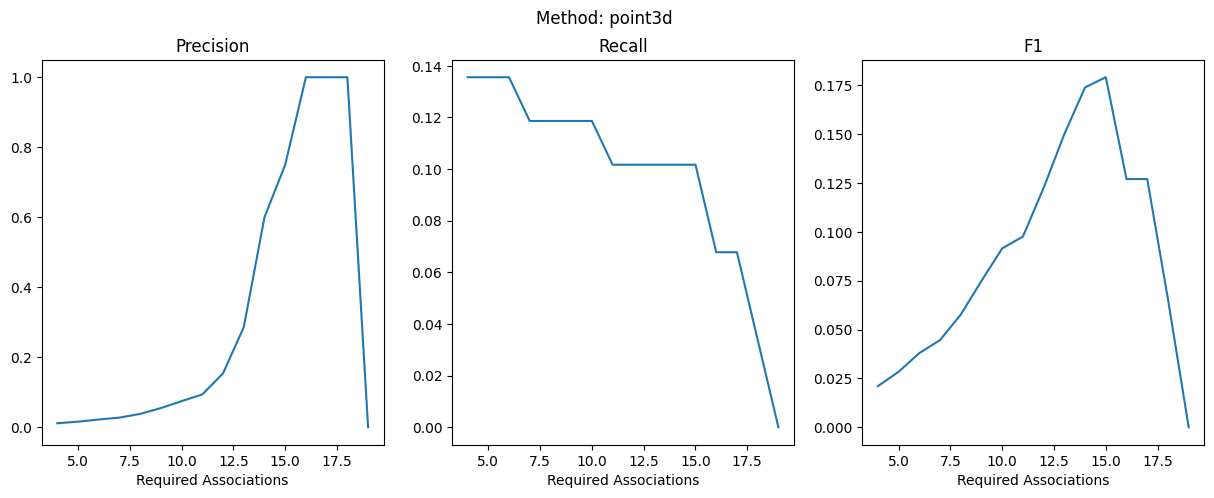

Method: prunevol3d
Best F1: 0.18461538461538463 at 12 associations


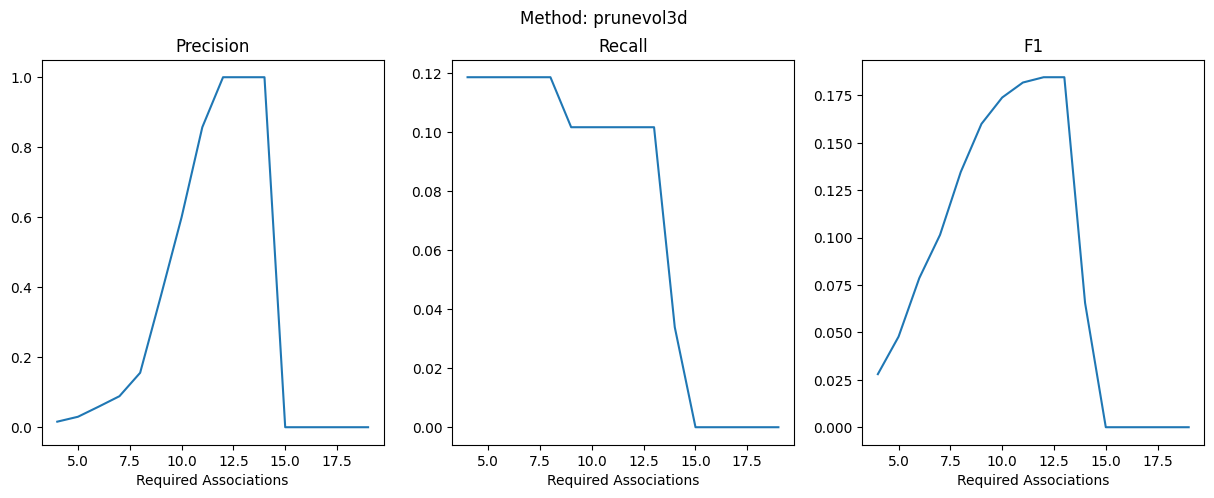

Method: prunevolgrav
Best F1: 0.18918918918918917 at 8 associations


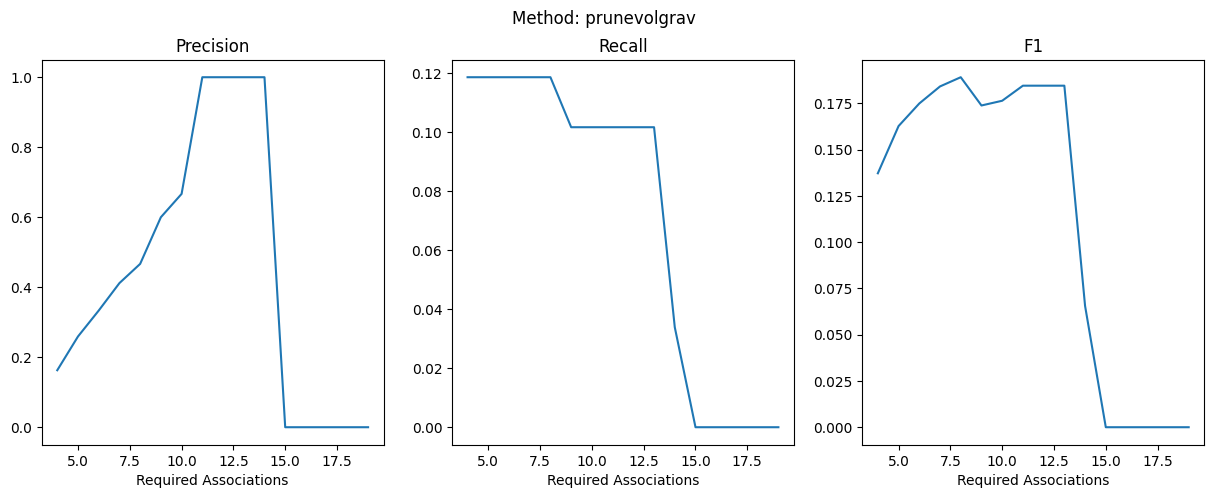

Method: extentvolgrav
Best F1: 0.2564102564102564 at 8 associations


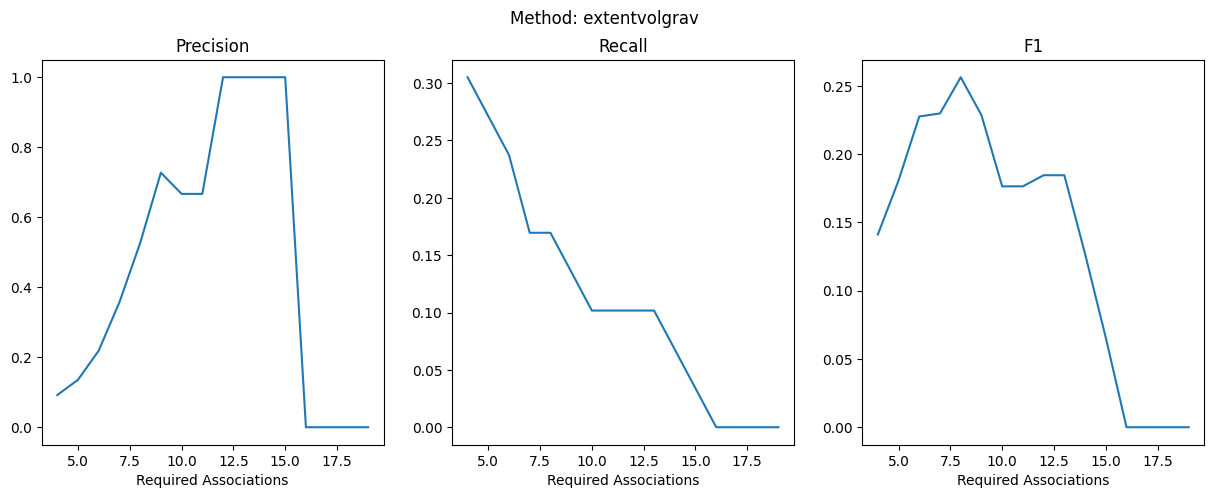

Best Association Requirements:
{'gravity': 9, 'point2d': 15, 'point3d': 15, 'prunevol3d': 12, 'prunevolgrav': 8, 'extentvolgrav': 8}


In [20]:
best_assoc_reqs = {}

for i, method in enumerate(methods):
    try:
        precisions, recalls, f1s, assoc_reqs = prf1_sweep([f"{results_dir}/{sub_dir}/{method}.pkl" for sub_dir in sub_dirs], req_overlap=req_overlap)
    except OSError as e:
        continue
    print(f"Method: {method}")
    print(f"Best F1: {f1s[np.argmax(f1s)]} at {assoc_reqs[np.argmax(f1s)]} associations")
    fig = plt.gcf()
    fig.suptitle(f"Method: {method}")
    plt.show()
    best_assoc_reqs[method] = assoc_reqs[np.argmax(f1s)]

print("Best Association Requirements:")
print(best_assoc_reqs)
    